## ORO!!! Forecasting

In [6]:
## Importando las librerías
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [7]:
dataframeGold = pd.read_csv('gold_price_data.csv')
print(dataframeGold.columns)
dataframeGold.describe()


Index(['Date', 'Value'], dtype='object')


,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [8]:
print(dataframeGold.dtypes)
dataframeGold.head(10)

Date      object
Value    float64
dtype: object


,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4
5,1971-04-01,38.9
6,1971-07-01,40.1
7,1971-10-01,42.0
8,1972-01-03,43.5
9,1972-04-03,48.3


In [9]:
etiqueta = np.array(dataframeGold['Value'])[2:]
car_m1 = np.array(dataframeGold['Value'])[1:-1]
car_m2 = np.array(dataframeGold['Value'])[:-2]
print(len(etiqueta))
print(len(car_m1))
print(len(car_m2))

10785
10785
10785


In [10]:
## Agrupando los datos en un único Dataframe y exportándolo a un archivo CSV
dataset = pd.DataFrame({'Carac menos 2':car_m2, 'Carac menos 1':car_m1, 'Etiqueta':etiqueta})
dataset.to_csv('goldPriceArranged.csv')
dataset.describe()

,Carac menos 2,Carac menos 1,Etiqueta
count,10785.000000,10785.000000,10785.000000
mean,653.427296,653.569670,653.711320
std,433.892886,433.941928,433.989363
min,35.100000,35.100000,35.400000
25%,349.150000,349.250000,349.250000
50%,409.350000,409.350000,409.500000
75%,1061.000000,1061.500000,1061.750000
max,1895.000000,1895.000000,1895.000000


In [11]:
## Pasando los datos a una matriz de tipo numpy
matrizDatos = dataset.to_numpy()
print(matrizDatos.shape)
print(matrizDatos)


(10785, 3)
[[  35.2    35.1    35.4 ]
 [  35.1    35.4    36.2 ]
 [  35.4    36.2    37.4 ]
 ...
 [1672.5  1655.7  1653.75]
 [1655.7  1653.75 1570.7 ]
 [1653.75 1570.7  1562.8 ]]


In [12]:
##Definición de la función de costo
def funcCosto(arr_1, arr_2):
  J = np.power(arr_1-arr_2,2)
  return np.sum(J)/(2*len(J))


In [13]:
## Pasos GridSearch
#  h(x) = T0*x0 + T1*x1

# 1. Valores a T0 a T1
dict_resultados = dict()
for T0 in np.arange(-2,2,1/100):
  for T1 in np.arange(-2,2,1/100):
  

#   2. Encuentras h(x)
    h_x = T0*car_m1 + T1*car_m2


#   3. Evalúar la función de costo
    dict_resultados[(T0,T1)]=funcCosto(h_x,etiqueta)
    
# 4. Encontrar el menor
parameters = list(dict_resultados.keys())
#print(parameters)
costValues = np.array(list(dict_resultados.values()))
#print(costValues)
indexMinCost = costValues.argmin()
print(indexMinCost)
bestParameters = parameters[indexMinCost]
print("Los mejores parámetros son:",bestParameters,"donde la función de costo retornó: ",costValues[indexMinCost])

119801
Los mejores parámetros son: (0.9900000000000029, 0.010000000000001563) donde la función de costo retornó:  40.803401532663564


Text(0.5, 0.92, 'Fig1. Datos precio Oro')

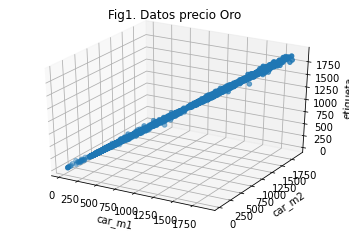

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#ax.plot3D(car_m1,car_m2,bestParameters[0]*car_m1+bestParameters[1]*car_m2,'r-')

ax.scatter3D(car_m1,car_m2,etiqueta)
ax.set_xlabel('car_m1')
ax.set_ylabel('car_m2')
ax.set_zlabel('etiqueta');
plt.title("Fig1. Datos precio Oro")


Como se puede apreciar, nuestra regresion calculada en la Fig2


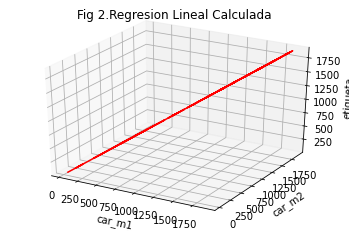

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(car_m1,car_m2,bestParameters[0]*car_m1+bestParameters[1]*car_m2,'r-')
#ax.scatter3D(car_m1,car_m2,etiqueta)
ax.set_xlabel('car_m1')
ax.set_ylabel('car_m2')
ax.set_zlabel('etiqueta');

plt.title("Fig 2.Regresion Lineal Calculada")
# Como se puede apreciar en la Figura 2, tenemos la regresion calculada, la cual si la comparamos con la figura 1, se acerca mucho a los valores que tenemos en la misma
# Por lo cual podemos decir que nuestra regresion calculada fué un exito